In [1]:
import pandas as pd
data=pd.read_csv('Happiness_index.csv')

In [2]:
data.head()
col_name=data.columns
data.loc[10:20,('country','adjusted_satisfaction')]
data.describe()

,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,happyScore,GDP
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,48.729730,5.936937,2.124595,6442.751416,5186.005304,38.417805,5.421910,0.841909
std,12.364131,1.356394,0.316546,6479.533692,5587.037239,8.375557,1.180801,0.387591
min,19.000000,2.500000,1.380000,572.880000,415.480000,24.215000,2.839000,0.015300
25%,40.000000,5.100000,1.910000,1519.388684,1167.717333,32.182857,4.568000,0.509930
50%,48.000000,6.000000,2.130000,3889.320000,2646.973333,36.480000,5.268000,0.918610
75%,57.000000,7.000000,2.330000,7867.402500,6581.124643,43.380000,6.392000,1.149485
max,74.000000,8.500000,3.190000,26182.275000,22240.230000,63.726667,7.587000,1.563910


In [3]:
data.sort_values('avg_income',inplace=True)#inplace=True makes an actual change in the dataset
richest=data[data['avg_income']>15000]
richest.iloc[0,0]
fin=len(richest)
fin
richest.iloc[fin-1,0]

'Luxembourg'

In [4]:
import numpy as np
np.mean(richest['std_satisfaction'])

1.7688888888888892

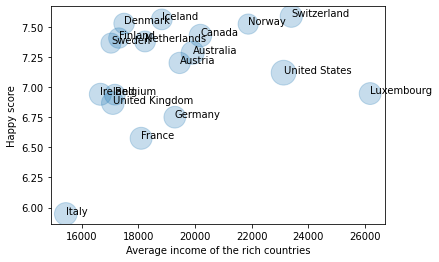

In [33]:
import matplotlib.pyplot as plt
plt.scatter(richest['avg_income'],richest['happyScore'],s=richest['income_inequality']*15,alpha=0.25)#s makes the size of the dot according to the income inequality.
for k,r in richest.iterrows():
    plt.text(r['avg_income'],r['happyScore'],r['country'])
plt.xlabel("Average income of the rich countries")
plt.ylabel("Happy score")
plt.show()


In [6]:
print(np.max(richest['happyScore']))
dx=data[data['happyScore']==max(richest['happyScore'])].index
print(richest.loc[dx,"country"])

7.5870000000000015
17    Switzerland
Name: country, dtype: object


In [27]:
from sklearn.cluster import KMeans
incomehapp=np.column_stack((data['happyScore'],data['avg_income']))
kmres=KMeans(n_clusters=3).fit(incomehapp)


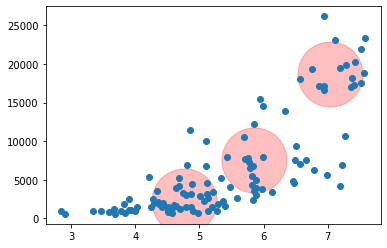

In [31]:
col=kmres.cluster_centers_
plt.scatter(col[:,0],col[:,1],s=4250,color="red",alpha=0.25)
plt.scatter(data['happyScore'],data['avg_income'])